In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [213]:
parkdata

,name,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitter,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,...,MDVPAPQ,ShimmerDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


This first step is just to get the data in a format that can be interpreted by the rest of the code (i.e. no spaces or special charecters) and removing the status column, as that is what tells us if the patient has Parkinsons or not which we don't want to include in the training set

In [55]:
parkdata=pd.read_csv(r"C:\Users\mebra\Documents\mlreview_notebooks-master\jupyter_notebooks\notebooks\Parkinsonsn\parkinsons.data")
X = parkdata.select_dtypes(include='number')
y = parkdata['status']
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
dfparkdata = pd.DataFrame(x_scaled)
columns=[ 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter',
       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP',
       'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
       'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
dfparkdata.columns=columns
dfparkdata.drop(['status'],axis=1)

,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitter,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,MDVPShimmerdB,...,MDVPAPQ,ShimmerDDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.155142,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318
191,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.088828,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558
192,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.072594,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580
193,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.066544,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137


## Setup for KNN
This is the first attempt at making a KNN network to predict weather a patient has Parkinson’s based off of these metrics of their voice. This should create a parameter space based on these datapoints and then test data will see how many of the nearest neighbors have a status of 1 and how many have a status of 0 and will assign the test data a 1 or 0 depending on what the majority of the nearest neighbors have. The following code has three parameters to change and three ways that the accuracy was evaluated. 
The things that were varied were
* The way the distance was calculated (p=1 correlates to the Manhattan distance, where distance is calculated as a path length where you can only move along the direction of the axis, while p=2 correlates to the Euclidean distance, or the shortest distance between two points)
* How the distance is weighted, where uniform (kk=0) all points that are considered to be nearest neighbors are weighted equally, and distance (kk=1) means that there is a weight factor inverse to the distance to the test point such that closer points are more heavily weighted to the final classification of the test point
* The number of nearest neighbors counted (N) where N=1 means that each test point had the same classification as the nearest point to it and N=30 means that the 30 closest points are taken into consideration

This algorithm was evaluated on three main criterion.
* Accuracy, I used sklearn's accuracy_score which is a value calculated as the number of test points that match their actual value divided by the total accuracy
* f1score, which is the $\frac{2tp}{2tp+fp+fn}$ where tp is true positives, fp is false positives and fn is false negatives. This is a score that summarizes the algorithims ability to be both precise and to identify everything that should be identified (also known as the recall) 
* The confusion matrix, which gives the number of true positives, true negatives, false positives and false negatives


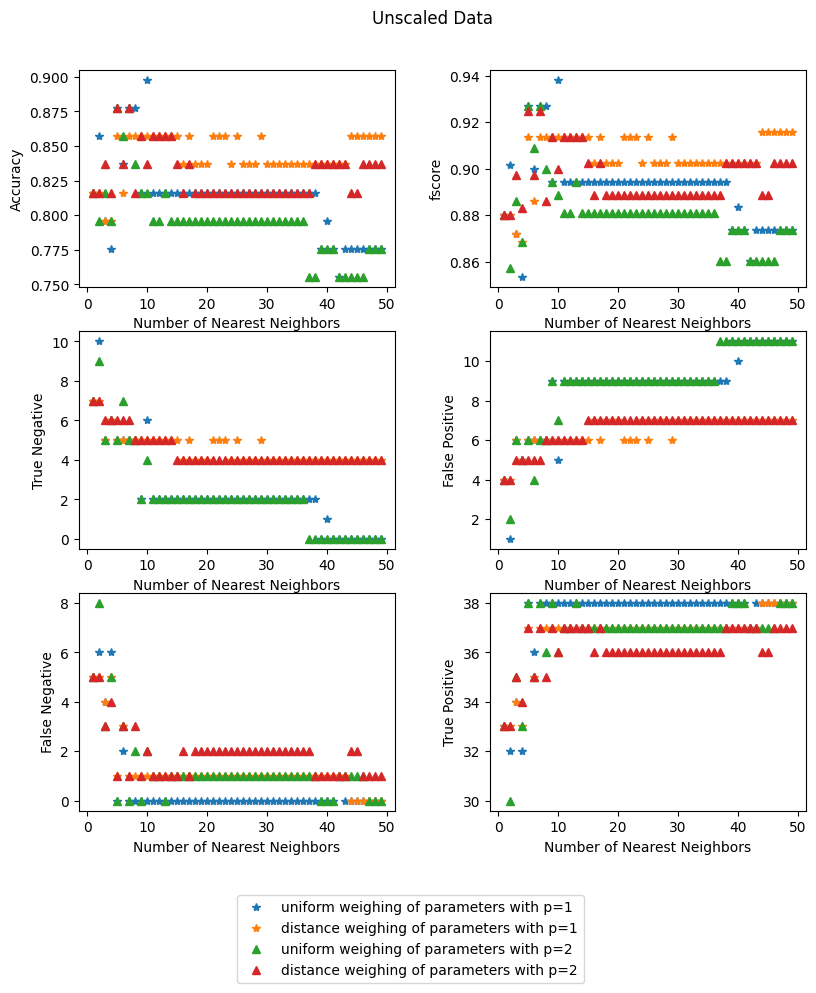

In [170]:
    ## Setup Validation Measures
    predk=np.zeros((N-1,2,2)
    fscore=np.zeros((N-1,2,2))
    trueneg=np.zeros((N-1,2,2))
    truepos=np.zeros((N-1,2,2))
    falsepos=np.zeros((N-1,2,2))
    falseneg=np.zeros((N-1,2,2))
    weightarr=['uniform','distance']
    f, axs=plt.subplots(3,2,figsize=(8,8))
    #fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
    f.tight_layout()
    for ll in range(2): ## Iterate over distance type
        for kk in range(2): ## Iterate over weight type
            for ii in range(1,N): ## Iterate over number of nearest neighbors
                   
                ## Read in data and set it up to not have the status and to have columns readable to the data
                parkdata=pd.read_csv(r"C:\Users\mebra\Documents\mlreview_notebooks-master\jupyter_notebooks\notebooks\Parkinsonsn\parkinsons.data")
                y = parkdata['status']
                columns=[ 'name','MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter',
                       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP',
                       'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
                       'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
                       'spread1', 'spread2', 'D2', 'PPE']
                parkdata.columns=columns
                parkdata=parkdata.drop(['status'],axis=1)
                X = parkdata.select_dtypes(include='number')
                   
                #Split data into test and train randomly (important because default was all grouped based on Parkinsons)
                X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
                #Setup and run classifier
                clf = KNeighborsClassifier(n_neighbors=ii,p=1+ll,weights=weightarr[kk],algorithm='ball_tree')
                clf.fit(X_train, y_train)
                predict = clf.predict(X_test)
                
                #Analyze accuracy
                predk[ii-1,ll,kk]=accuracy_score(y_test, predict)
                conmat=confusion_matrix(y_test,predict)
                trueneg[ii-1,ll,kk]=conmat[0,0]
                falseneg[ii-1,ll,kk]=conmat[1,0]
                truepos[ii-1,ll,kk]=conmat[1,1]
                falsepos[ii-1,ll,kk]=conmat[0,1]
                fscore[ii-1,ll,kk]=f1_score(y_test,predict)
            #Plot
            if ll==0:
                ind='*'
            if ll==1:
                ind='^'
            axs[0,0].plot(range(1,N),predk[:,ll,kk],ind,label=weightarr[kk]+' weighing of parameters with p='+str(ll+1))
            axs[0,1].plot(range(1,N),fscore[:,ll,kk],ind)
            axs[1,0].plot(range(1,N),trueneg[:,ll,kk],ind)
            axs[2,0].plot(range(1,N),falseneg[:,ll,kk],ind)
            axs[1,1].plot(range(1,N),falsepos[:,ll,kk],ind)
            axs[2,1].plot(range(1,N),truepos[:,ll,kk],ind)


            axs[0,0].set_xlabel('Number of Nearest Neighbors')
            axs[0,1].set_xlabel('Number of Nearest Neighbors')
            axs[1,0].set_xlabel('Number of Nearest Neighbors')
            axs[0,0].set_xlabel('Number of Nearest Neighbors')
            axs[1,1].set_xlabel('Number of Nearest Neighbors')
            axs[2,0].set_xlabel('Number of Nearest Neighbors')
            axs[2,1].set_xlabel('Number of Nearest Neighbors')
            plt.subplots_adjust(wspace=0.3)
            axs[0,0].set_ylabel('Accuracy')
            axs[0,1].set_ylabel('f1 Score')
            axs[1,0].set_ylabel('True Negative')
            axs[2,0].set_ylabel('False Negative')
            axs[1,1].set_ylabel('False Positive')
            axs[2,1].set_ylabel('True Positive')
            axs[0,0].legend(loc=[0.5,-3.2])
            f.suptitle("Unscaled Data",x=0.5,y=1.05) 
            #plt.title(title,loc=[0.5,3])
            #axs[1].legend
    #return predk, fscore, falsepos,truepos,falseneg,trueneg
#allAc,allf,allfp,alltp,allfn,alltn=allMetricCompare(title='Comparasion of Accuracy Metrics for All Data and All Parameters')

## Analysis of Unscaled Data
Here we see that in general less than 20 nearest neighbors preforms the best, perhaps indicating that higher than that number the range extended outside the range within which the parameter space was dominated by the correct diagnosis, a hypothesis further supported by distance weighting tending to preform higher in higher N cases. It also appears that given the correct number of nearest neighbors uniform weighting with the manhatten distance yields the highest accuracy and f1 score. Another pheonomenon that initially confused me was the discrete levels which seemed to be valid scores, but taking a closer look at the size of the training data set I belive this to be an artifact of the low amount of testing data leading to a visible difference when one point was calculated differently.

## Scaling Data 

We can do better than this though if we modify the data to be scaled the same. As it is there is a much larger difference between 137 and 141 of the upper value of the frequency compared to a difference of 0.0003 and 0.0004 for the jitter even though the percent change is much larger for the jitter, and there is no reason by default to weight the upper frequency higher than the jitter so it makes more sense to scale all the data between 0 and 1, and we see we do in fact get much better results 

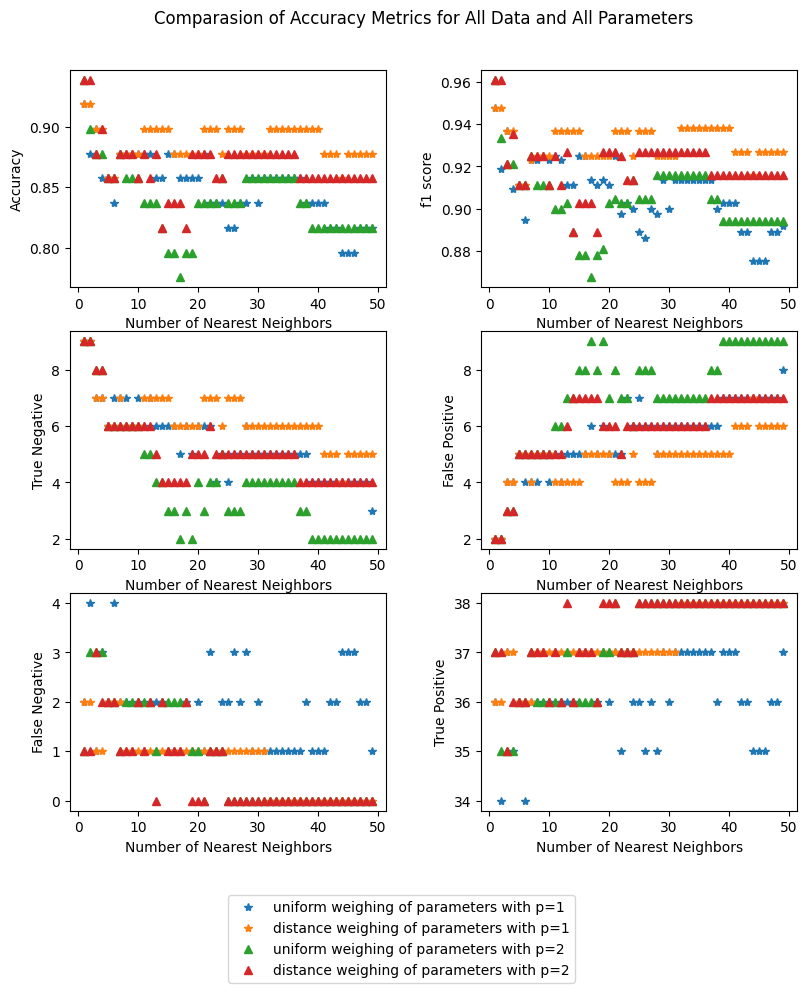

In [217]:
#N=50
def allMetricCompare(N=50,lrange=[0,1],dropcolumns=[],title=''):
    #predk=np.zeros((N-1,len(lrange),2))
    #fscore=np.zeros((N-1,len(lrange),2))
    #trueneg=np.zeros((N-1,len(lrange),2))
    #truepos=np.zeros((N-1,len(lrange),2))
    #falsepos=np.zeros((N-1,len(lrange),2))
    #falseneg=np.zeros((N-1,len(lrange),2))
    predk=np.zeros((N-1,2,2))
    fscore=np.zeros((N-1,2,2))
    trueneg=np.zeros((N-1,2,2))
    truepos=np.zeros((N-1,2,2))
    falsepos=np.zeros((N-1,2,2))
    falseneg=np.zeros((N-1,2,2))
    weightarr=['uniform','distance']
    f, axs=plt.subplots(3,2,figsize=(8,8))
    #fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
    f.tight_layout()
    for ll in lrange:
        for kk in range(2):
            for ii in range(1,N):
                parkdata=pd.read_csv(r"C:\Users\mebra\Documents\mlreview_notebooks-master\jupyter_notebooks\notebooks\Parkinsonsn\parkinsons.data")
                X = parkdata.select_dtypes(include='number')
                y = parkdata['status']
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(X)
                dfparkdata = pd.DataFrame(x_scaled)
                columns=[ 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter',
                       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP',
                       'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
                       'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
                       'spread1', 'spread2', 'D2', 'PPE']
                dfparkdata.columns=columns
                dfparkdata=dfparkdata.drop(['status'],axis=1)
                dfparkdata=dfparkdata.drop(dropcolumns,axis=1)
                #print(dfparkdata)
                X1 = dfparkdata.select_dtypes(include='number')
                #y = dfparkdata['status']
                X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 100)
                clf = KNeighborsClassifier(n_neighbors=ii,p=1+ll,weights=weightarr[kk],algorithm='ball_tree')
                clf.fit(X_train, y_train)
                predict = clf.predict(X_test)
                predk[ii-1,ll,kk]=accuracy_score(y_test, predict)
                conmat=confusion_matrix(y_test,predict)
                trueneg[ii-1,ll,kk]=conmat[0,0]
                falseneg[ii-1,ll,kk]=conmat[1,0]
                truepos[ii-1,ll,kk]=conmat[1,1]
                falsepos[ii-1,ll,kk]=conmat[0,1]
                fscore[ii-1,ll,kk]=f1_score(y_test,predict)
            if ll==0:
                ind='*'
            if ll==1:
                ind='^'
            axs[0,0].plot(range(1,N),predk[:,ll,kk],ind,label=weightarr[kk]+' weighing of parameters with p='+str(ll+1))
            axs[0,1].plot(range(1,N),fscore[:,ll,kk],ind)
            axs[1,0].plot(range(1,N),trueneg[:,ll,kk],ind)
            axs[2,0].plot(range(1,N),falseneg[:,ll,kk],ind)
            axs[1,1].plot(range(1,N),falsepos[:,ll,kk],ind)
            axs[2,1].plot(range(1,N),truepos[:,ll,kk],ind)


            axs[0,0].set_xlabel('Number of Nearest Neighbors')
            axs[0,1].set_xlabel('Number of Nearest Neighbors')
            axs[1,0].set_xlabel('Number of Nearest Neighbors')
            axs[0,0].set_xlabel('Number of Nearest Neighbors')
            axs[1,1].set_xlabel('Number of Nearest Neighbors')
            axs[2,0].set_xlabel('Number of Nearest Neighbors')
            axs[2,1].set_xlabel('Number of Nearest Neighbors')
            plt.subplots_adjust(wspace=0.3)
            axs[0,0].set_ylabel('Accuracy')
            axs[0,1].set_ylabel('f1 score')
            axs[1,0].set_ylabel('True Negative')
            axs[2,0].set_ylabel('False Negative')
            axs[1,1].set_ylabel('False Positive')
            axs[2,1].set_ylabel('True Positive')
            axs[0,0].legend(loc=[0.5,-3.2])
            f.suptitle(title,x=0.5,y=1.05) 
            #plt.title(title,loc=[0.5,3])
            #axs[1].legend
    return predk, fscore, falsepos,truepos,falseneg,trueneg
allAc,allf,allfp,alltp,allfn,alltn=allMetricCompare(title='Comparasion of Accuracy Metrics for All Data and All Parameters')

## Analysis of Scaled data
Compared to before it seems that scaling the data increased the effacacy of the KNN in making accurate predictions across all fronts. It seems to have shrunken the range of nearest neighbors that gives the higest accuracy,where anything greater than around 7 performs poorly. Distance weighting with euclidan distance takes the lead in both the accuracy and f1 score, which makes sense to me as euclidan distance and distance weighting both allow for more percision, which would be helpful in any dataset but especially one as small as this one. 
Additionally it seems that as the number of nearest neighbors grow more points are counted as positive as both the true and false positive rate increase while both the true and false negative decrease. This likely simply due to an imbalance of the number of datapoints for each group.

Below I have split up these graphs for increased legibility

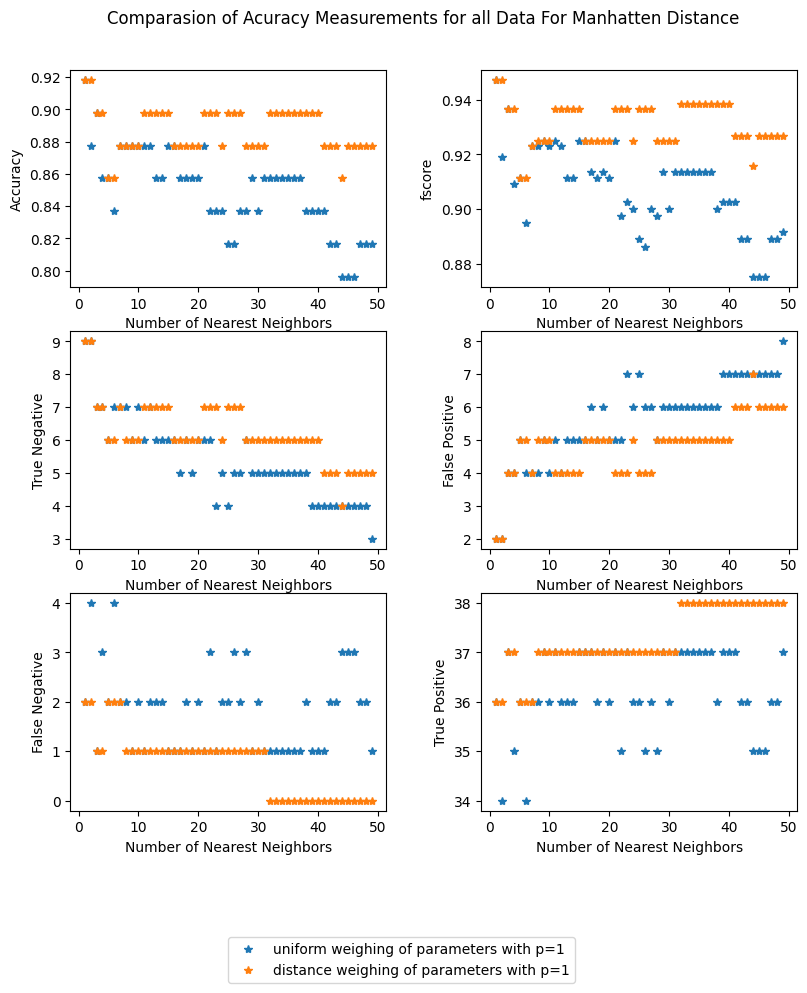

In [173]:
allAc,allf,allfp,alltp,allf,alltn=allMetricCompare(lrange=[0],title='Comparasion of Acuracy Measurements for all Data For Manhatten Distance')

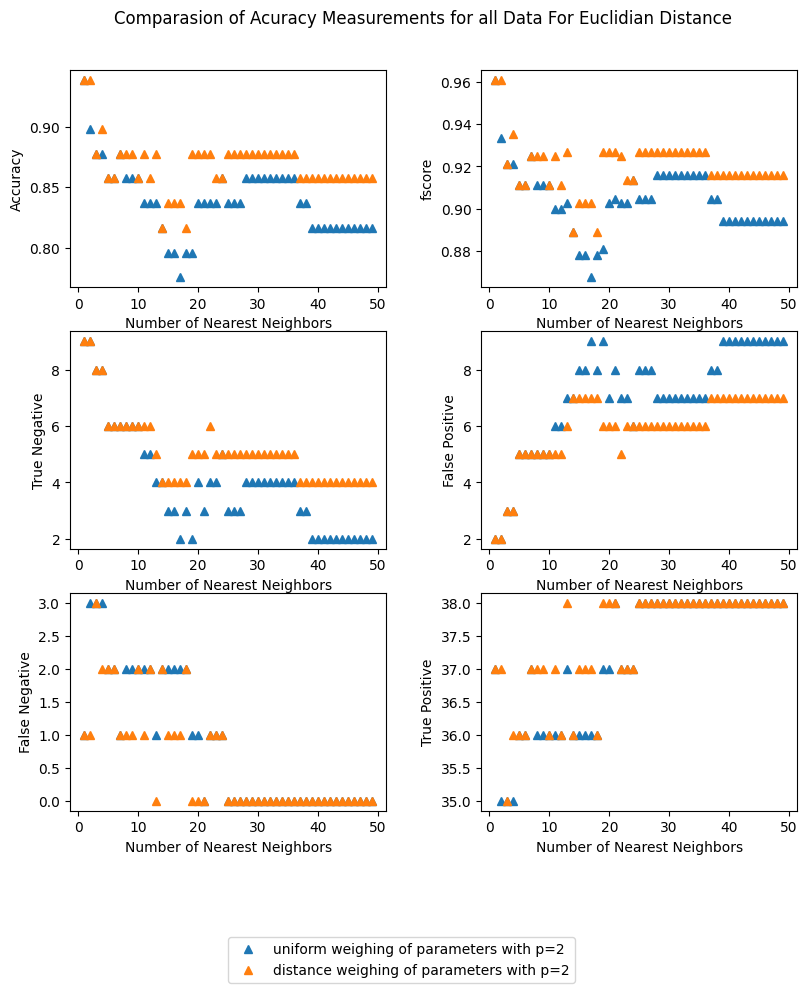

In [174]:
allAc,allf,allfp,alltp,allfn,alltn=allMetricCompare(lrange=[1],title='Comparasion of Acuracy Measurements for all Data For Euclidian Distance')

I also wanted to investigate which parameter had the greatest impact on the overall effacacy of the algorithim and so which parameters would be the most important and so reran the tests while dropping out one of the metrics at a time which I was then able to measure the percent difference between these metrics and the acccuracy with all the data

C:\Users\mebra\AppData\Local\Temp\ipykernel_1668\384605422.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axs=plt.subplots(3,2,figsize=(8,8))


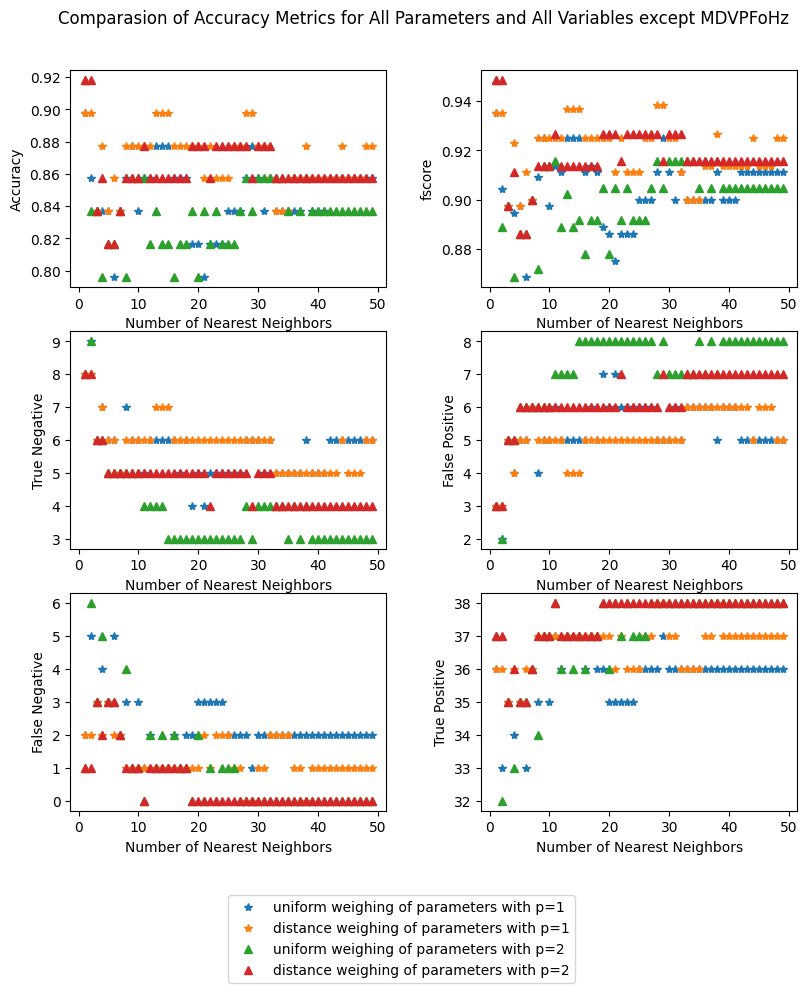

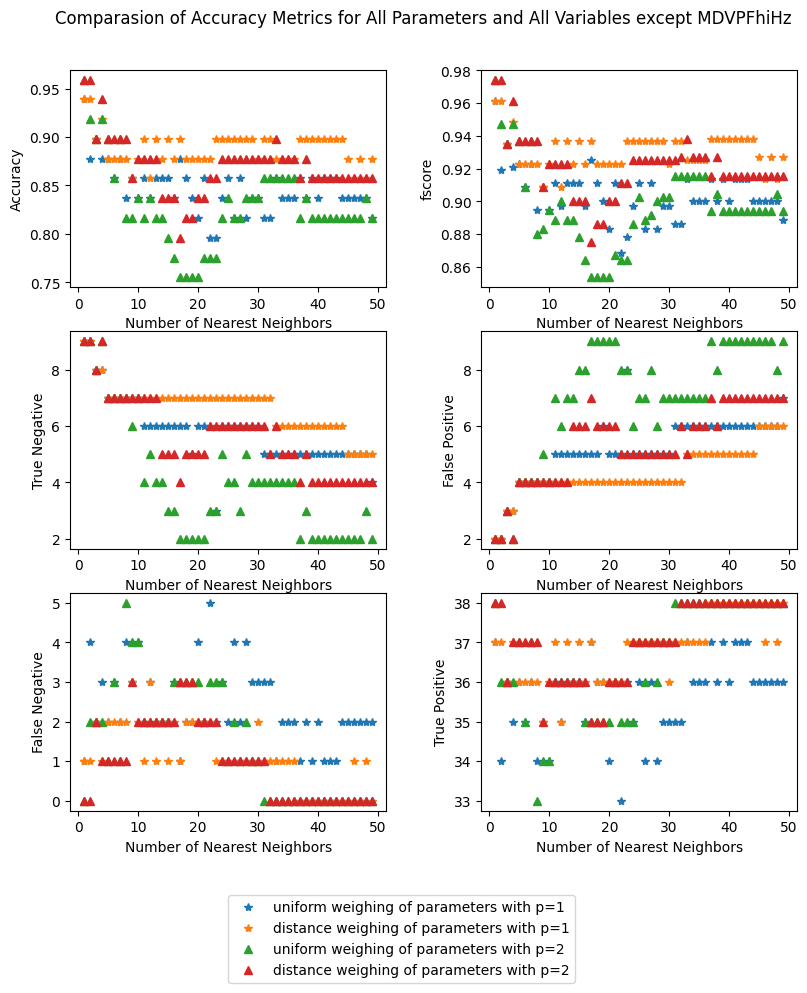

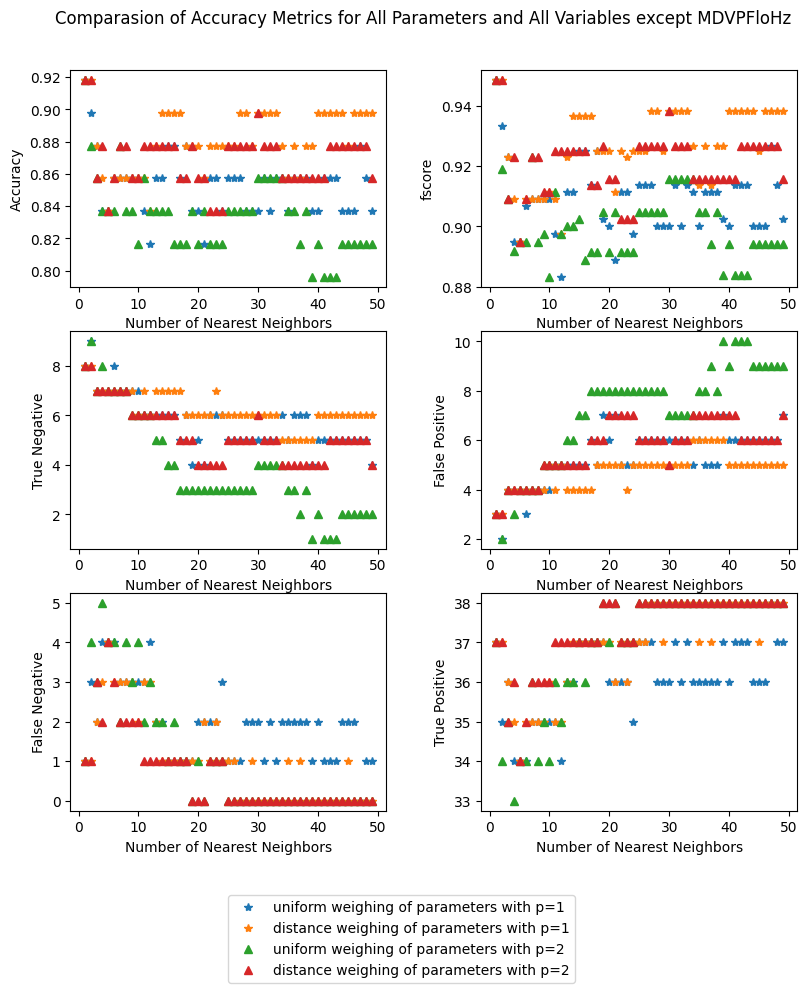

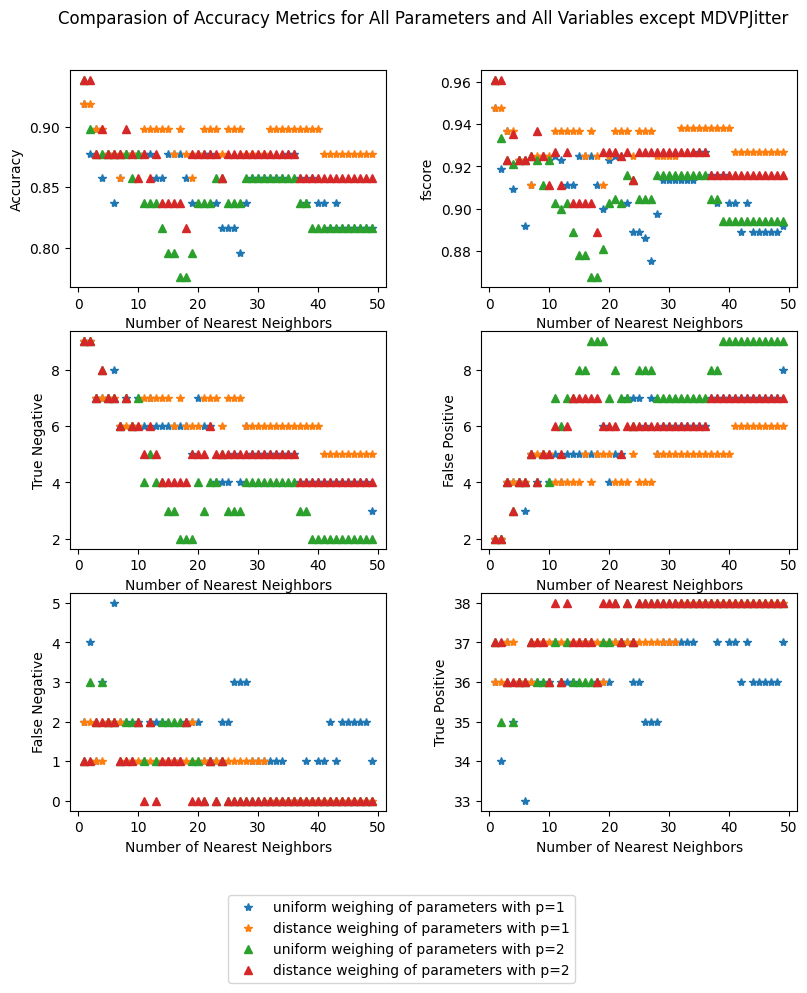

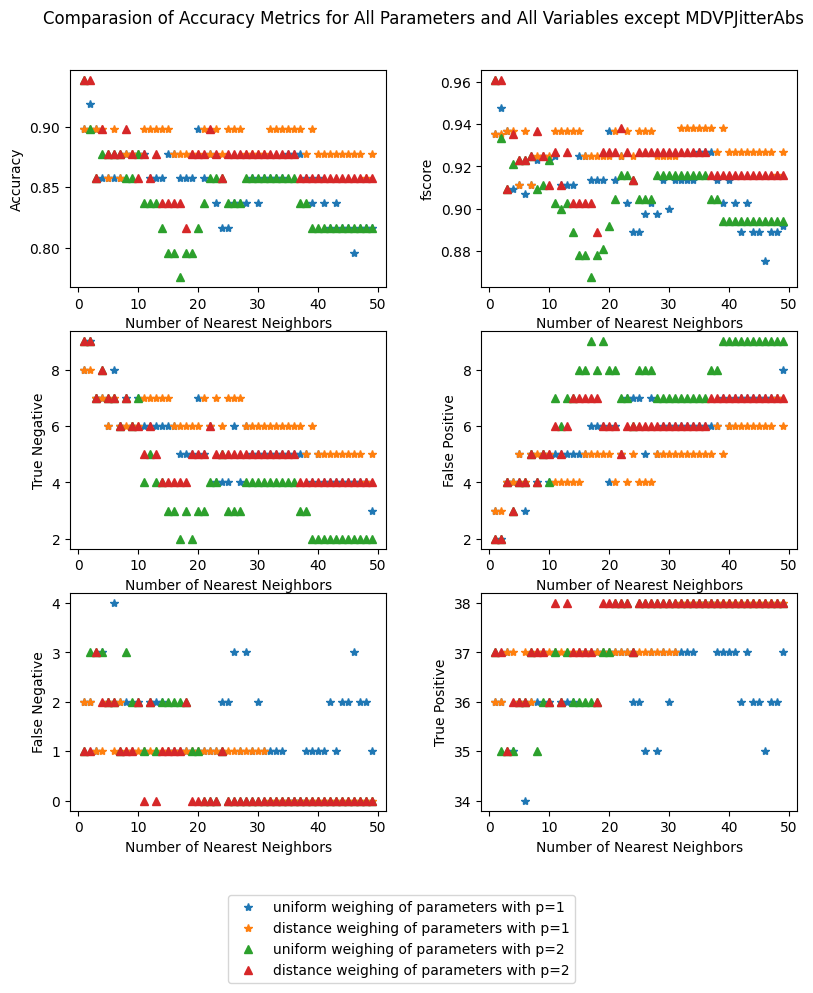

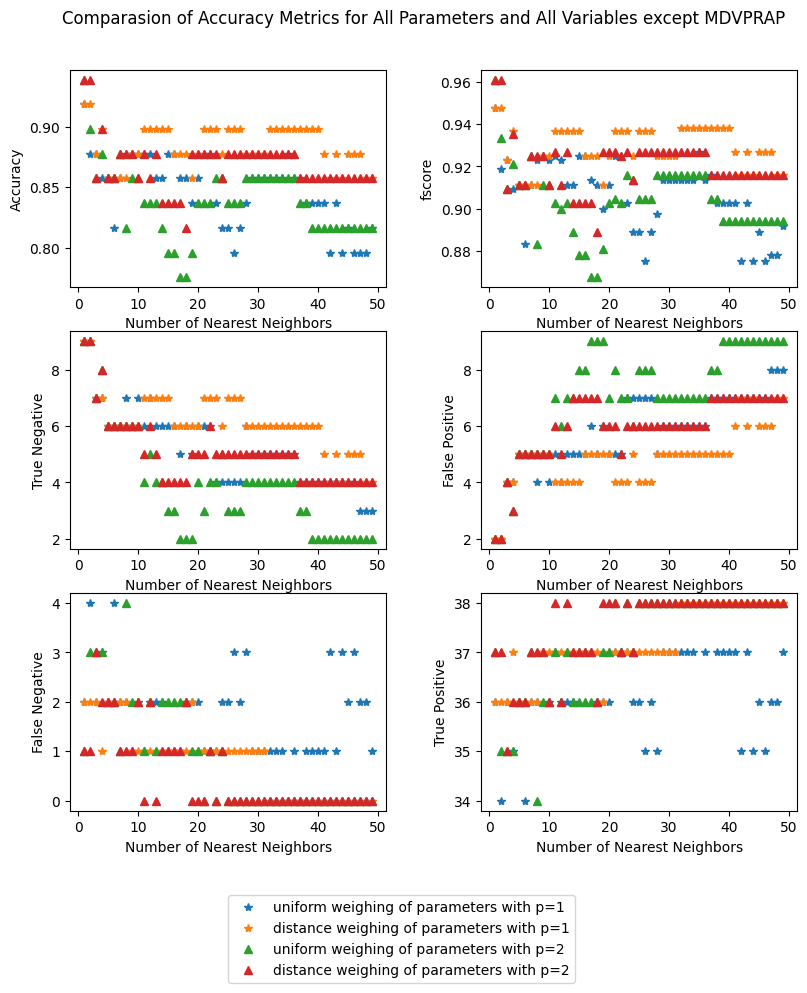

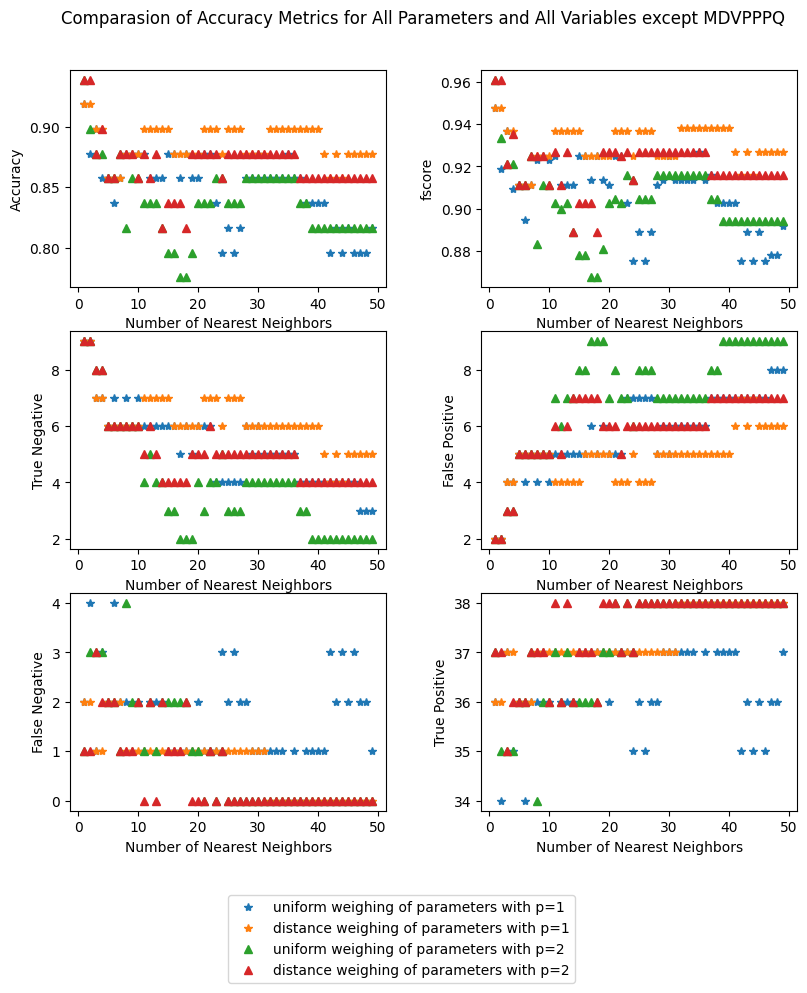

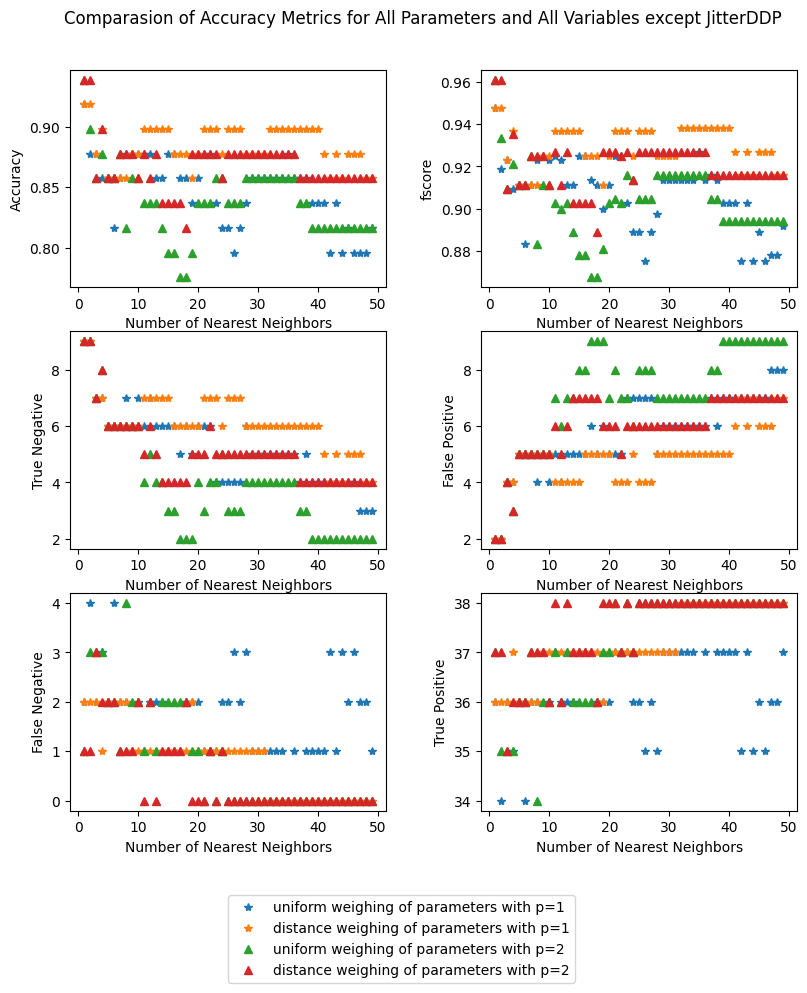

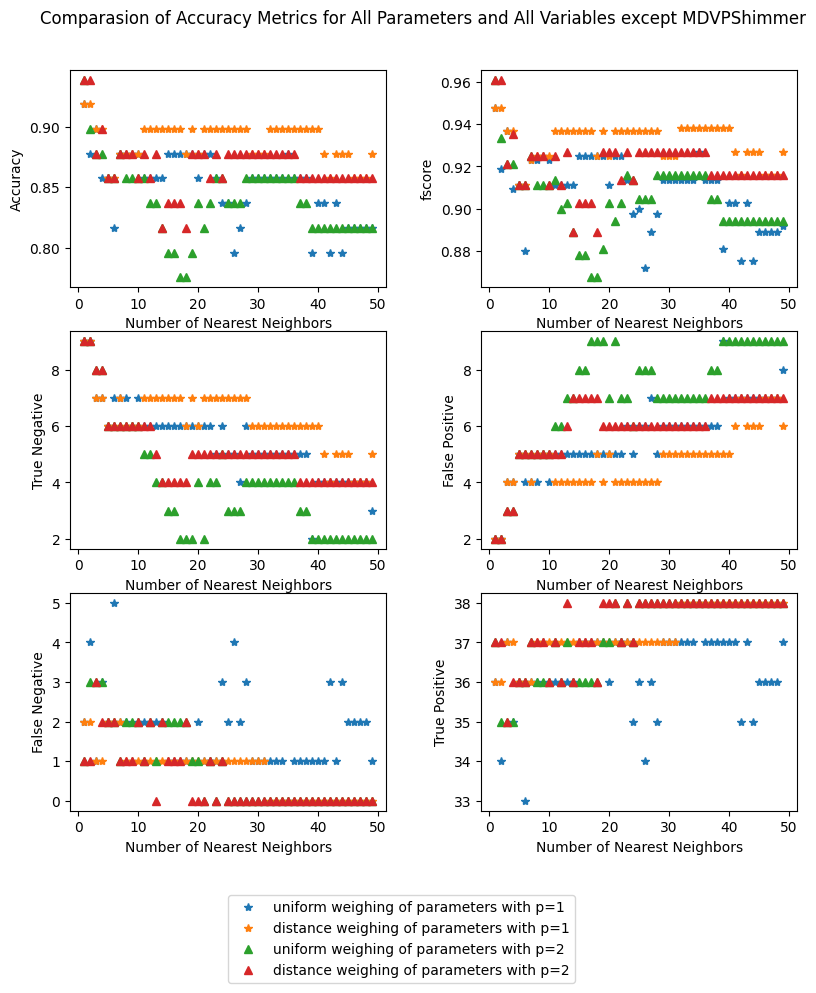

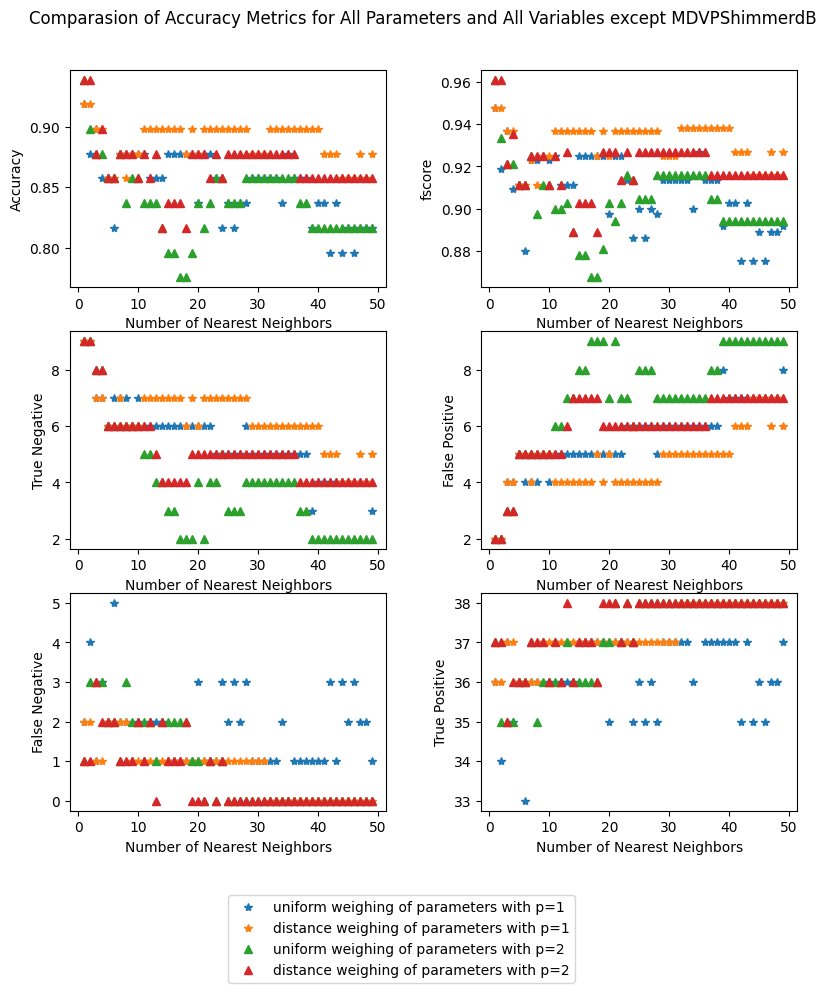

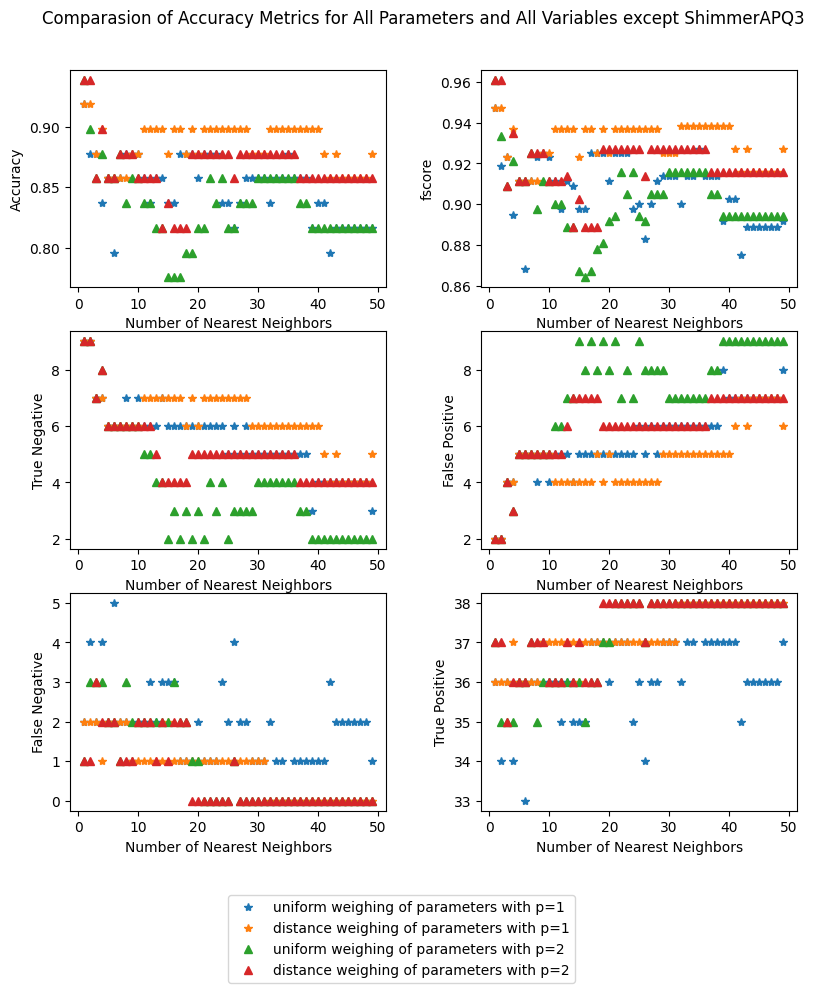

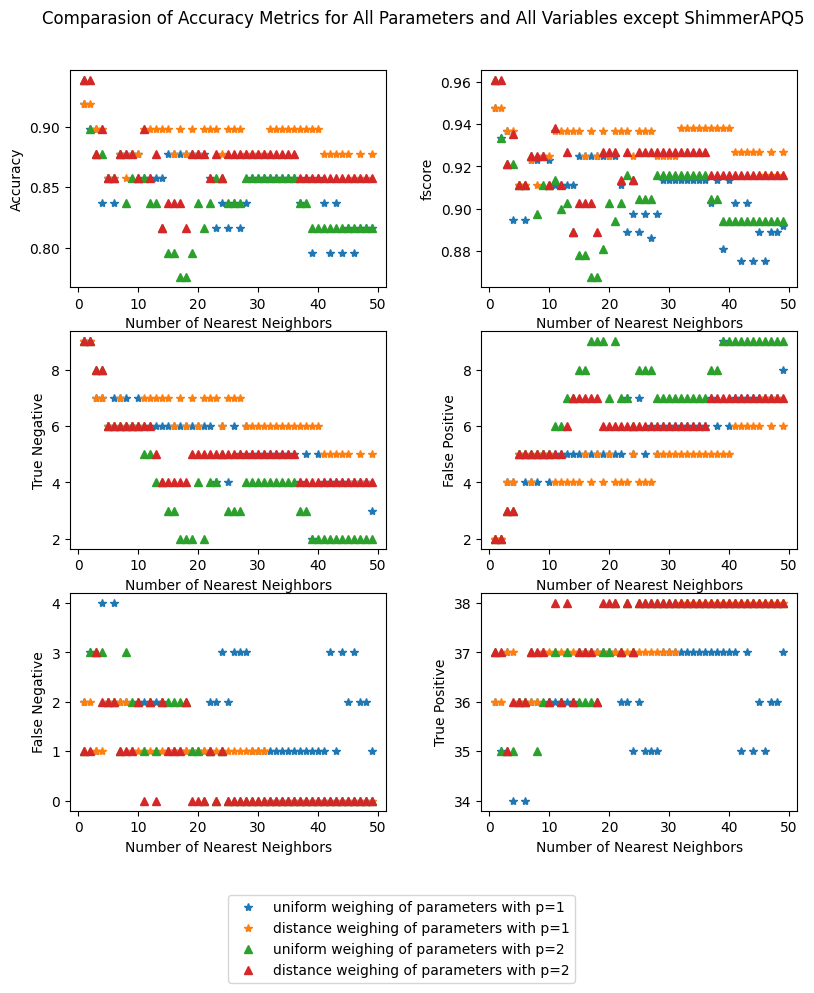

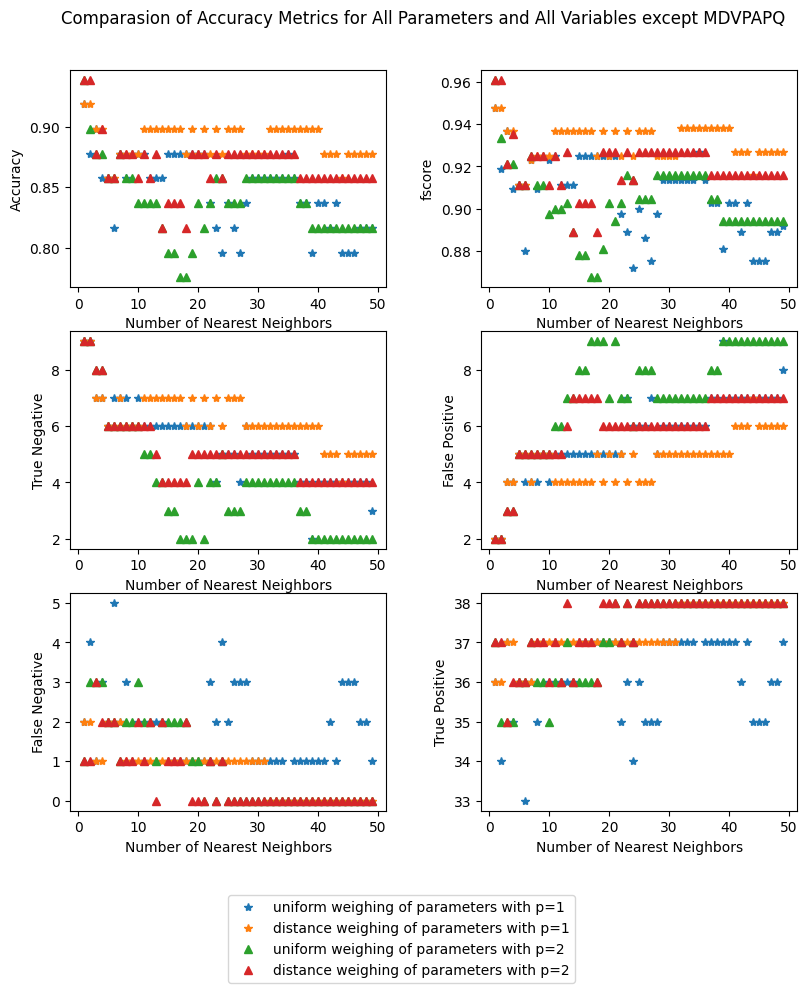

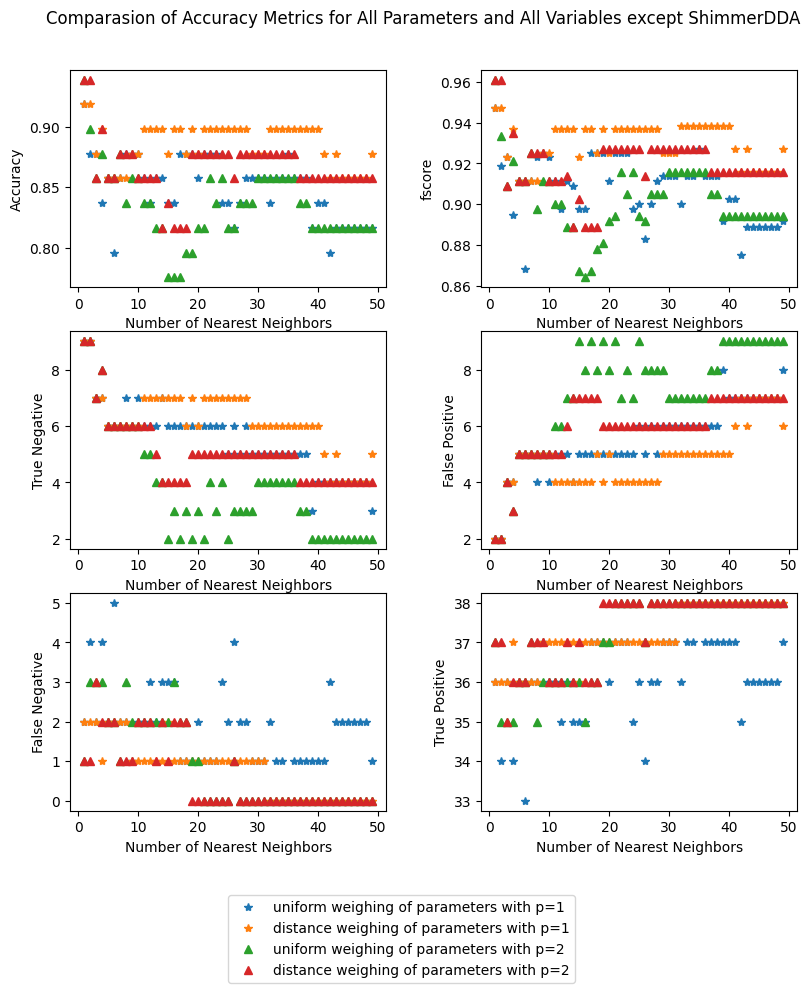

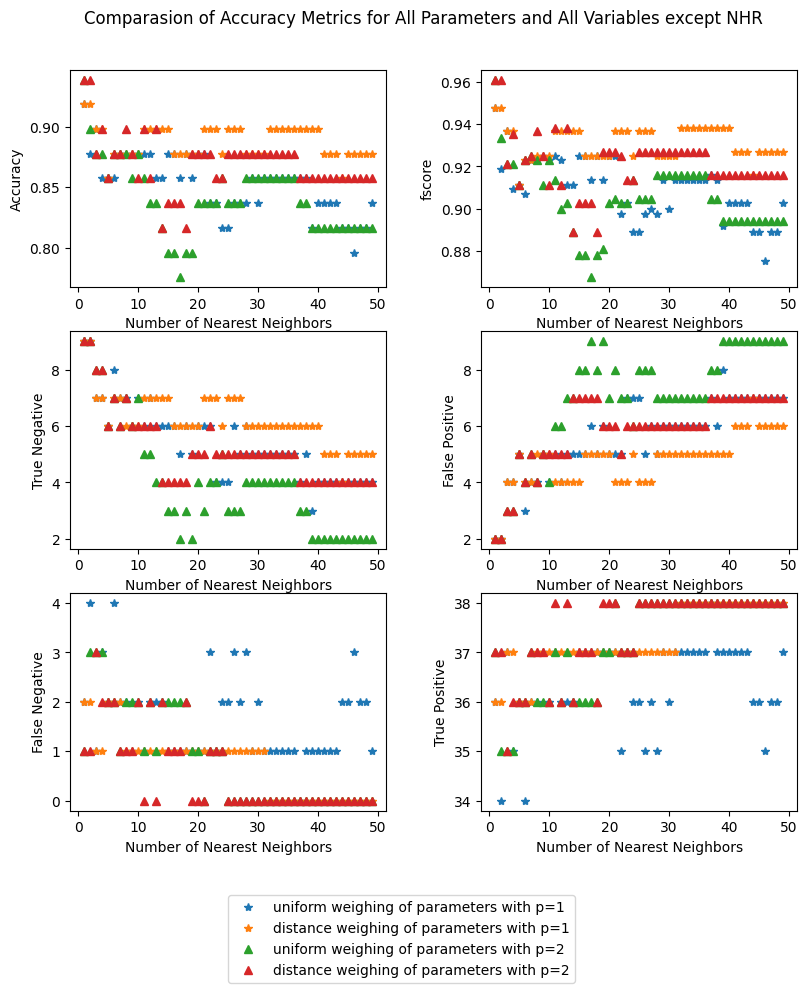

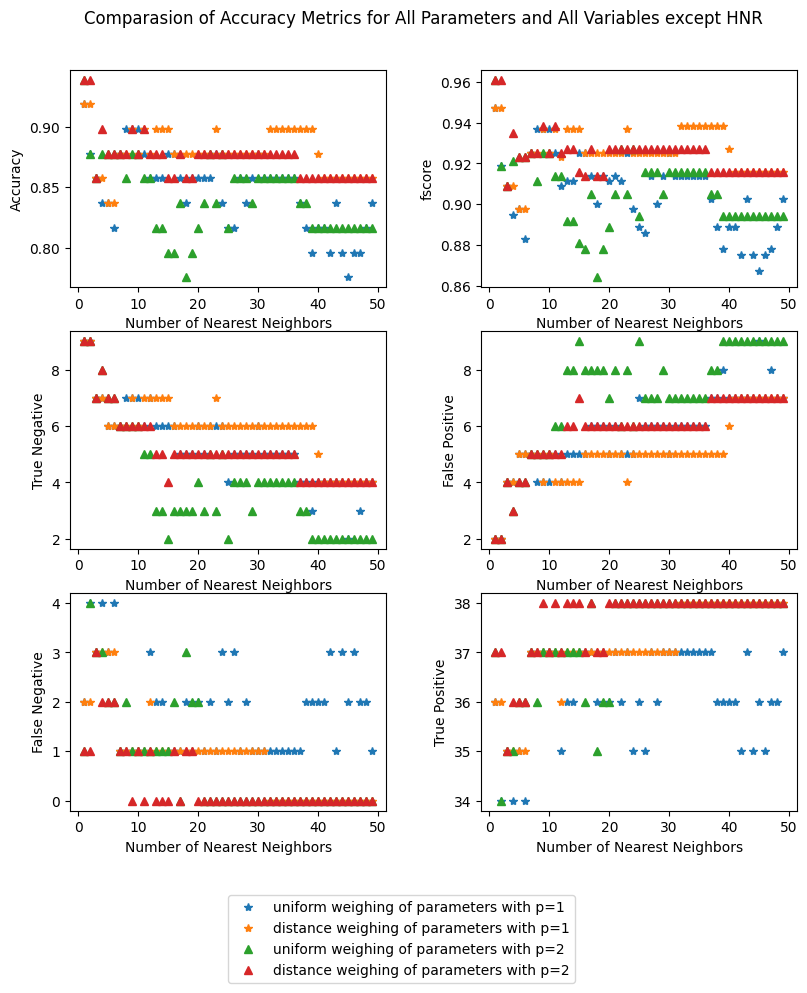

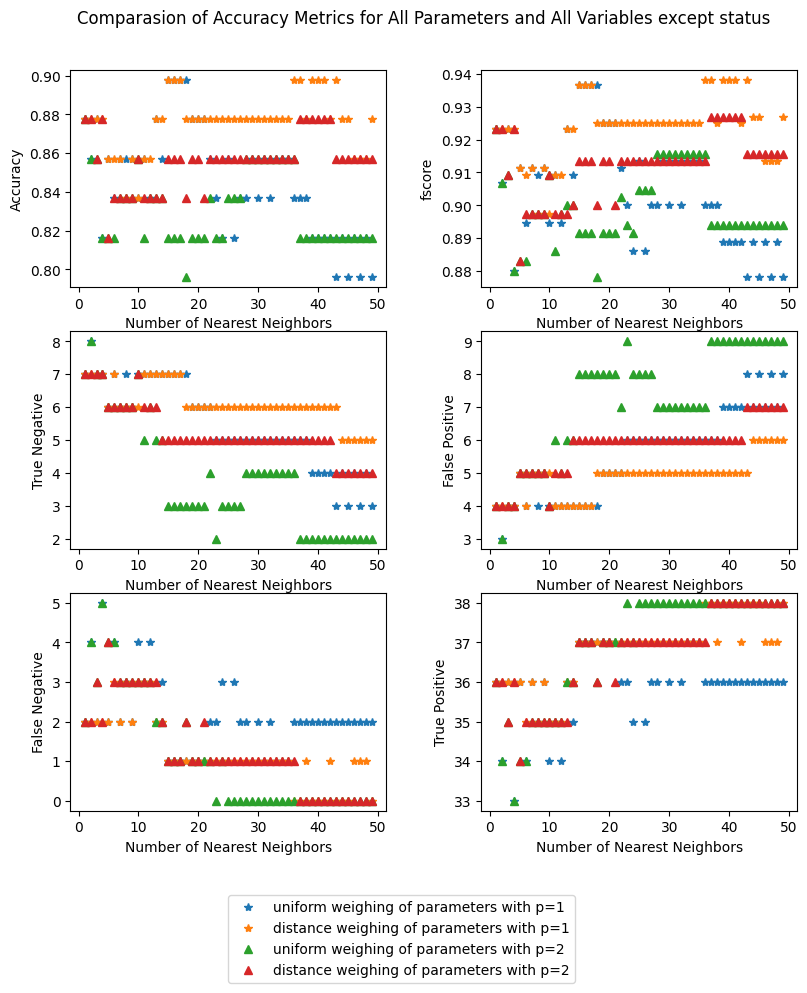

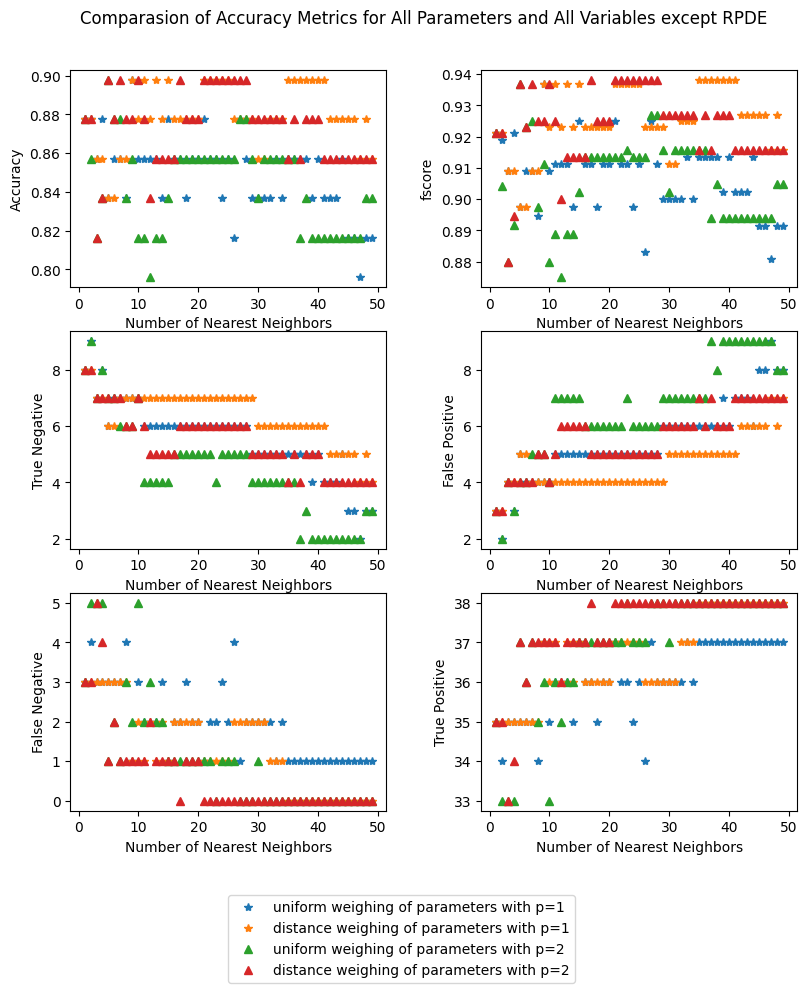

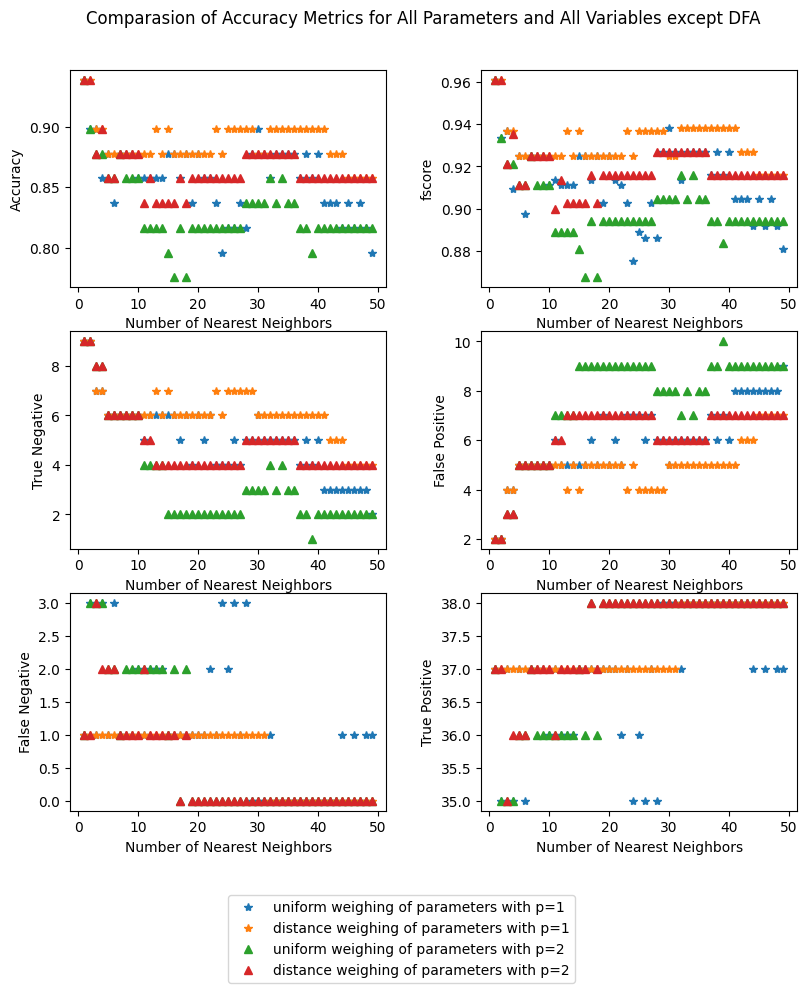

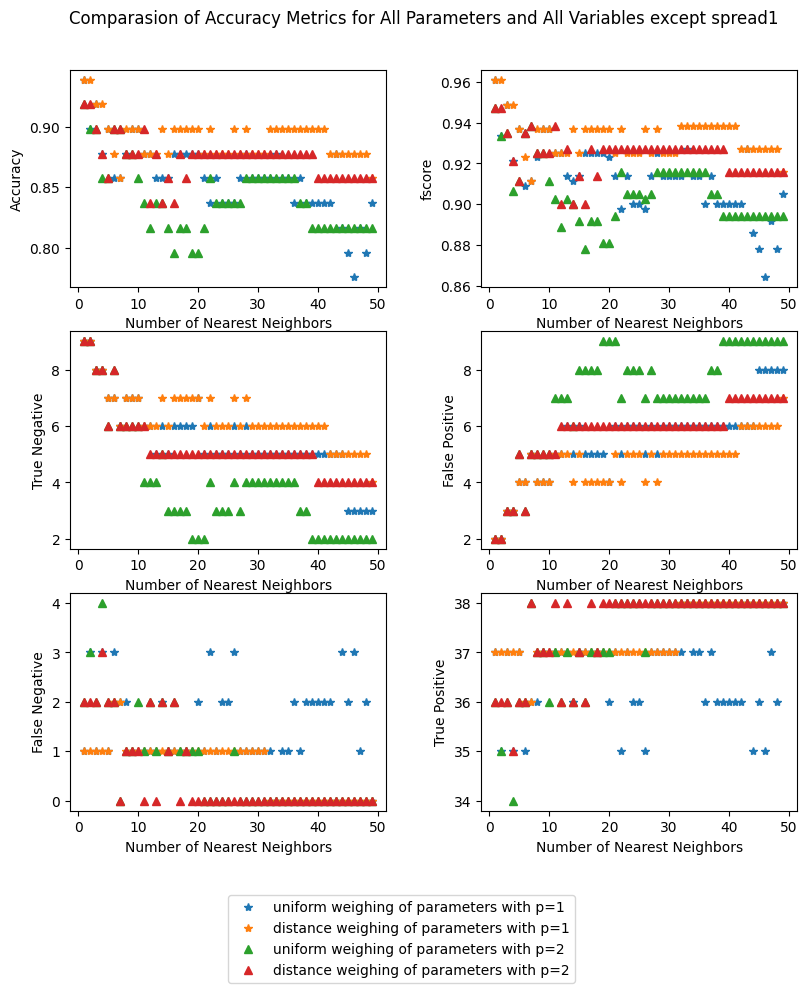

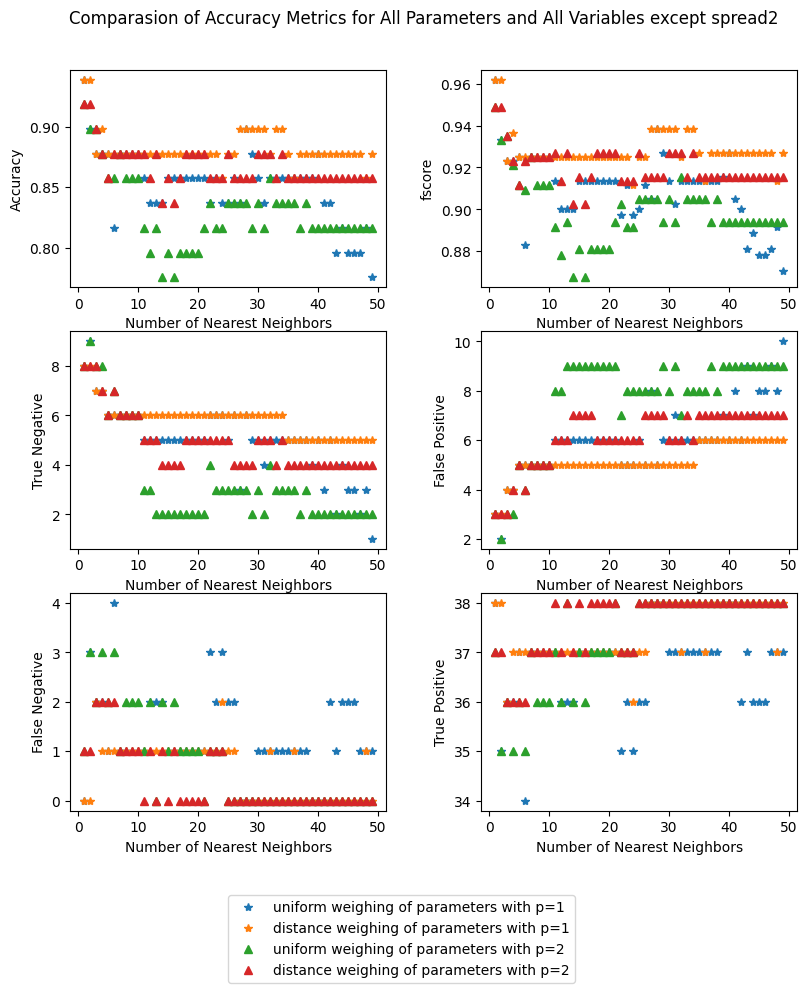

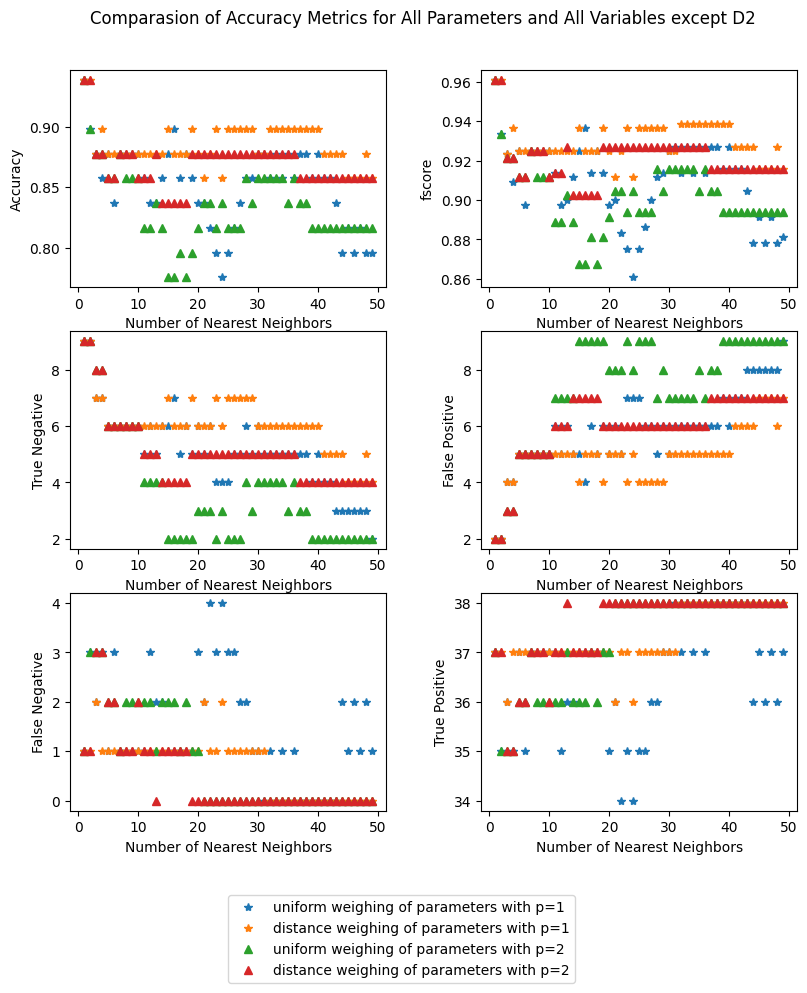

In [205]:
c=[ 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter',
                       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP',
                       'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
                       'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'RPDE', 'DFA',
                       'spread1', 'spread2', 'D2', 'PPE']
varAc=np.zeros((len(c),49,2,2))
varf=np.zeros((len(c),49,2,2))
varfp=np.zeros((len(c),49,2,2))
vartp=np.zeros((len(c),49,2,2))
varfn=np.zeros((len(c),49,2,2))
vartn=np.zeros((len(c),49,2,2))
for mm in range(len(c)):
    varAc[mm],varf[mm],varfp[mm],vartp[mm],varfn[mm],vartn[mm]=allMetricCompare(dropcolumns=c[mm],title='Comparasion of Accuracy Metrics for All Parameters and All Variables except '+columns[mm])

In [190]:
dfparkdata = pd.DataFrame(x_scaled)
dropcolumns=[ 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter',
                       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP',
                       'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
                       'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'RPDE', 'DFA',
                       'spread1', 'spread2', 'D2', 'PPE']
columns=[ 'MDVPFoHz', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPJitter',
       'MDVPJitterAbs', 'MDVPRAP', 'MDVPPPQ', 'JitterDDP',
       'MDVPShimmer', 'MDVPShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
       'MDVPAPQ', 'ShimmerDDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
dfparkdata.columns=columns
dfparkdata=dfparkdata.drop(columns=['status'],axis=1)
dfparkdata=dfparkdata.drop(['MDVPFoHz'],axis=1)
#print(dfparkdata)

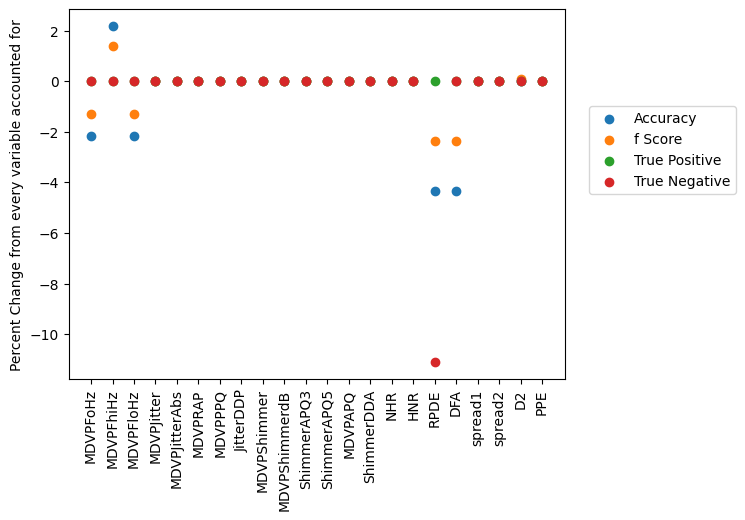

In [218]:
AcChange=np.zeros(len(c))
fChange=np.zeros(len(c))
fpChange=np.zeros(len(c))
tpChange=np.zeros(len(c))
fnChange=np.zeros(len(c))
tnChange=np.zeros(len(c))
for kk in range(len(varAc)):
    AcChange[kk]=(np.amax(varAc[kk,:,:,:])-np.amax(allAc))/np.amax(allAc)
    fChange[kk]=(np.amax(varf[kk,:,:,:])-np.amax(allf))/np.amax(allf)
    fpChange[kk]=(np.amax(varfp[kk,:,:,:])-np.amax(allfp))/np.amax(allfp)
    tpChange[kk]=(np.amax(vartp[kk,:,:,:])-np.amax(alltp))/np.amax(alltp)
    fnChange[kk]=(np.amax(varfn[kk,:,:,:])-np.amax(allfn))/np.amax(allfn)
    tnChange[kk]=(np.amax(vartn[kk,:,:,:])-np.amax(alltn))/np.amax(alltn)


plt.scatter(c,100*AcChange,label='Accuracy')
plt.scatter(c,100*fChange,label='f Score')
#plt.scatter(c,fpChange,label='False Positive')
#plt.scatter(c,fnChange,label='False Negative')
plt.scatter(c,100*tpChange,label='True Positive')
plt.scatter(c,100*tnChange,label='True Negative')
plt.ylabel('Percent Change from every variable accounted for')
plt.xticks(range(len(c)), c,rotation=90)
plt.legend(loc=[1.05,0.5])

It looks like RPDE, a complexity measure, was the most important measure contributing to determining the diagnosis of the patient. Interestiingly it looks like removing the maximum focal frequency actually improved the maximum accuracy, though the change is small enough it could be a fluke, or could be that this extra data was so minimally helpful that accounting for it hurt the overall effacacy of the KNN